In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow
import keras

DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.4)
test_gen=ImageDataGenerator(rescale=(1./255))

In [ ]:
train=train_gen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/train_data/train_data',
                                    target_size=(120,120),
                                    class_mode= 'categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/test_data/test_data',
                                    target_size=(120,120),
                                    class_mode= 'categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 101s 5s/step - loss: 4.5134 - accuracy: 0.1333 - val_loss: 3.1655 - val_accuracy: 0.0255
Epoch 2/10
19/19 [==============================] - 95s 5s/step - loss: 2.7045 - accuracy: 0.1400 - val_loss: 2.6537 - val_accuracy: 0.1911
Epoch 3/10
19/19 [==============================] - 95s 5s/step - loss: 2.3808 - accuracy: 0.3200 - val_loss: 2.5539 - val_accuracy: 0.2548
Epoch 4/10
19/19 [==============================] - 95s 5s/step - loss: 2.2239 - accuracy: 0.3267 - val_loss: 2.6303 - val_accuracy: 0.2229
Epoch 5/10
19/19 [==============================] - 122s 7s/step - loss: 1.9912 - accuracy: 0.4200 - val_loss: 2.5108 - val_accuracy: 0.2866
Epoch 6/10
19/19 [==============================] - 93s 5s/step - loss: 1.7589 - accuracy: 0.4533 - val_loss: 2.5627 - val_accuracy: 0.2420
Epoch 7/10
19/19 [==============================] - 96s 5s/step - loss: 1.5532 - accuracy: 0.5133 - val_loss: 2.5722 - val_accuracy: 0.2930
Epoch 8/10
19/19 [

In [ ]:
model.save('BirdsspeciesWeights.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/Images to be tested/Blasti.jpg',target_size=(120,120))

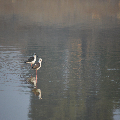

In [ ]:
img

In [ ]:
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 117ms/step
blasti


Model is not accurate thats why its giving cmnmyn even though we given Blasti bird species


Model Tuning(Adding feature extraction layers)

In [ ]:
model=Sequential()
model.add(Convolution2D(48,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(136,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(92,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 48)      1344      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        41568     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 136)       117640    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 136)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=6)

Epoch 1/6
7/7 [==============================] - 96s 15s/step - loss: 0.2225 - accuracy: 0.9600 - val_loss: 2.8071 - val_accuracy: 0.3758
Epoch 2/6


In [ ]:
# img4=image.img_to_array(img4)
# img4=np.expand_dims(img4,axis=0)
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 198ms/step
blasti


Model Tuning(with dropout,normalization &early stoping)

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Dropout

In [ ]:
model=Sequential()
model.add(Convolution2D(48,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Convolution2D(96,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Convolution2D(136,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(92,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 118, 118, 48)      1344      
                                                                 
 batch_normalization_4 (Batc  (None, 118, 118, 48)     192       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 59, 59, 48)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 59, 59, 48)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 57, 96)        41568     
                                                                 
 batch_normalization_5 (Batc  (None, 57, 57, 96)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop=EarlyStopping(monitor='val_accuracy',patience=4)

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=25,callbacks=earlystop)

Epoch 1/25
19/19 [==============================] - 104s 5s/step - loss: 2.8686 - accuracy: 0.1267 - val_loss: 3.1844 - val_accuracy: 0.0127
Epoch 2/25
19/19 [==============================] - 94s 5s/step - loss: 2.4094 - accuracy: 0.2667 - val_loss: 3.3073 - val_accuracy: 0.0382
Epoch 3/25
19/19 [==============================] - 95s 5s/step - loss: 2.2081 - accuracy: 0.3333 - val_loss: 3.2776 - val_accuracy: 0.0382
Epoch 4/25
19/19 [==============================] - 95s 5s/step - loss: 1.9891 - accuracy: 0.4267 - val_loss: 3.2151 - val_accuracy: 0.0510
Epoch 5/25
19/19 [==============================] - 96s 5s/step - loss: 1.8904 - accuracy: 0.4533 - val_loss: 3.2561 - val_accuracy: 0.0637
Epoch 6/25
19/19 [==============================] - 97s 5s/step - loss: 1.8084 - accuracy: 0.4867 - val_loss: 3.4092 - val_accuracy: 0.1274
Epoch 7/25
19/19 [==============================] - 98s 5s/step - loss: 1.8609 - accuracy: 0.4467 - val_loss: 3.3710 - val_accuracy: 0.0955
Epoch 8/25
19/19 [=

In [ ]:
img1=image.load_img('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/Images to be tested/jglowl.jpg',target_size=(120,120))

In [ ]:
img1

array([[[[ 54.,  55.,  57.],
         [ 66.,  71.,  74.],
         [118., 116., 129.],
         ...,
         [ 50.,  43.,  37.],
         [ 68.,  63.,  57.],
         [ 83.,  81.,  58.]],

        [[ 56.,  59.,  64.],
         [ 72.,  73.,  78.],
         [112., 114., 113.],
         ...,
         [ 33.,  32.,  30.],
         [ 59.,  65.,  53.],
         [ 54.,  62.,  51.]],

        [[ 64.,  64.,  64.],
         [ 97., 102., 106.],
         [123., 115., 113.],
         ...,
         [ 47.,  49.,  46.],
         [ 69.,  70.,  64.],
         [ 52.,  60.,  62.]],

        ...,

        [[112., 108., 105.],
         [103.,  98.,  95.],
         [ 79.,  80.,  85.],
         ...,
         [ 42.,  46.,  47.],
         [ 38.,  42.,  51.],
         [132., 132., 140.]],

        [[108., 108., 108.],
         [ 96.,  98.,  97.],
         [ 90.,  90.,  88.],
         ...,
         [ 30.,  35.,  39.],
         [ 40.,  44.,  45.],
         [ 36.,  34.,  35.]],

        [[ 95.,  96.,  90.],
       

In [ ]:
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 40ms/step
cmnmyn


In [ ]:
# img1=image.img_to_array(img1)
# img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
himbul


Transfer Learning


In [ ]:

from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np

In [ ]:
train_path="/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/train_data/train_data"
test_path="/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/test_data/test_data"

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
train=train_gen.flow_from_directory(train_path,
                                    target_size=(224,224),
                                    batch_size=22,
                                    class_mode='categorical')
test=test_gen.flow_from_directory(test_path,
                                    target_size=(224,224),
                                    batch_size=22,
                                    class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
prediction=Dense(16,activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit_generator(train,validation_data=test,epochs=5,steps_per_epoch=len(train),validation_steps=len(test))

<ipython-input-15-a475b9224259>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,validation_data=test,epochs=5,steps_per_epoch=len(train),validation_steps=len(test))


Epoch 1/5
7/7 [==============================] - 100s 14s/step - loss: 3.4702 - accuracy: 0.1667 - val_loss: 3.1882 - val_accuracy: 0.2102
Epoch 2/5
7/7 [==============================] - 91s 14s/step - loss: 1.7527 - accuracy: 0.4667 - val_loss: 2.7855 - val_accuracy: 0.3439
Epoch 3/5
7/7 [==============================] - 120s 19s/step - loss: 1.0843 - accuracy: 0.6933 - val_loss: 2.5967 - val_accuracy: 0.3312
Epoch 4/5
7/7 [==============================] - 91s 14s/step - loss: 0.5840 - accuracy: 0.8200 - val_loss: 3.0082 - val_accuracy: 0.3631
Epoch 5/5
7/7 [==============================] - 89s 14s/step - loss: 0.3314 - accuracy: 0.9133 - val_loss: 2.8909 - val_accuracy: 0.3885


In [ ]:
model.save('BirdsspeciesWeights.h5')

In [ ]:
img1=image.load_img('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/Images to be tested/jglowl.jpg',target_size=(224,224))

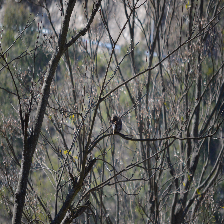

In [ ]:
img1

In [ ]:
# img1=image.img_to_array(img1)
# img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 1s 709ms/step
rebimg


Inseption